# Fourier Descriptors
---
**Notebook 4 — 2026**
<div style="font-size:15px; padding:8px; margin:2px; font-weight:600; background-color:#E80808; color:white;text-align:center;">
    <div style=" ">
        Introduction to Multidimensional Fourier Transform
    </div>
</div>
<div style="border-bottom: 1px gray dotted; padding:8px;margin:2px;text-align:center; font-size:15px; color:#444;">
<i>Daniel Sage — École Polytechnique Fédérale de Lausanne (EPFL)</i>
</div>

**Important notice**: These interactive notebooks complement the lecture and are not self-contained; in-class explanations are required.

## 4.1 Creating shapes

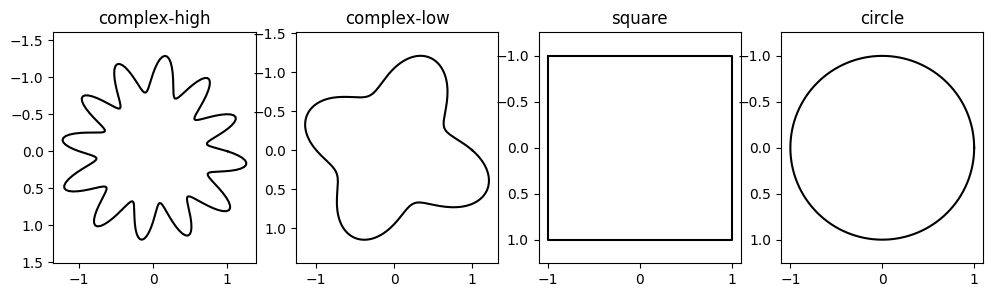

In [4]:
import numpy as np, matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown

def show_shape(ax, z, t):
    zc = np.r_[z, z[0]]
    ax.plot(zc.real, zc.imag, 'k'); ax.axis("equal"); ax.set_title(t); ax.invert_yaxis()
    
def resample(z, n=128):
    z = np.asarray(z); zc = np.r_[z, z[0]]
    d = np.abs(np.diff(zc)); s = np.r_[0, np.cumsum(d)]
    t = np.linspace(0, s[-1], n, endpoint=False)
    xr = np.interp(t, s, zc.real); yr = np.interp(t, s, zc.imag)
    return xr + 1j*yr

def complex_shape(k=8,n=256):
    t=np.linspace(0,2*np.pi,n,endpoint=False)
    r=1+0.25*np.sin(k*t)+0.05*np.sin(3*t)
    return r*np.exp(1j*t)

def square(n=256): z=np.array([-1-1j,1-1j,1+1j,-1+1j]); return resample(z,n)
def circle(n=256): t=np.linspace(0,2*np.pi,n,endpoint=False); return np.exp(1j*t)

shapes={"complex-high":complex_shape(12), "complex-low":complex_shape(4), "square":square(), "circle":circle()}

fig,ax=plt.subplots(1,4,figsize=(12,3))
for a,(k,z) in zip(ax,shapes.items()): show_shape(a,z,k)
plt.show()


## 4.2 Encoding the curve contour

In [5]:
@interact(shape=Dropdown(options=list(shapes.keys()),value="complex-high"))
def descriptors(shape):
    z=resample(shapes[shape])
    s=np.linspace(0,1,len(z))
    Z=np.fft.fft(z)
    fig,ax=plt.subplots(2,2,figsize=(10,6))
    ax[0,0].plot(s,z.real); ax[0,0].set_title("x(s)")
    ax[0,1].plot(s,z.imag); ax[0,1].set_title("y(s)")
    ax[1,0].plot(np.log(np.abs(np.fft.fftshift(Z))+1e-12))
    ax[1,0].set_title("log |Fourier descriptors|")
    show_shape(ax[1,1],shapes[shape],'shape')
    for a in ax.flatten(): a.grid(True,color="0.85",lw=0.5)
    plt.show()

interactive(children=(Dropdown(description='shape', options=('complex-high', 'complex-low', 'square', 'circle'…

## 4.3 Simplify the curve

In [6]:
@interact(shape=Dropdown(options=list(shapes.keys()),value="complex-high"),
          K=IntSlider(min=2,max=32,step=2,value=20))
def reconstruct(shape,K):
    z=resample(shapes[shape]); z=z-z.mean()
    Z=np.fft.fft(z)
    Zk=np.zeros_like(Z); h=K//2
    Zk[:h+1]=Z[:h+1]; Zk[-h:]=Z[-h:]
    zk=np.fft.ifft(Zk)
    s=np.linspace(0,1,len(z))

    fig,ax=plt.subplots(2,2,figsize=(7,7))
    show_shape(ax[0,0],z,"Original")
    show_shape(ax[0,1],zk,f"Reconstruction (K={K})")
  
    ax[1,0].plot(s,z.real,label="orig"); ax[1,0].plot(s,zk.real,'--',label="recon")
    ax[1,0].set_title("x(s)")
    ax[1,1].plot(s,z.imag,label="orig"); ax[1,1].plot(s,zk.imag,'--',label="recon")
    ax[1,1].set_title("y(s)")


    for a in ax.flatten(): a.grid(True,color="0.85",lw=0.5)
    ax[1,0].legend(); ax[1,1].legend()
    plt.tight_layout(); plt.show()


interactive(children=(Dropdown(description='shape', options=('complex-high', 'complex-low', 'square', 'circle'…